Problem description in Decision Tree

Breast cancer is the most prevalent cancer in women in cities, and the second most common cancer in women in rural areas. We identify most breast cancers at an advanced stage is because of a lack of knowledge of the disease and the lack of a breast cancer screening program.

This causes the development of innovative methods for detecting breast cancer at an early stage. We hope to show the possibilities of a Decision tree for healthcare analysis-based machine learning algorithms in the early detection of breast cancer through test results and features in this case study.

Because we are categorizing whether the tissue is cancerous or benign, we will train multiple Tree-based models for this procedure. We’ll experiment with hyper-parameters to see if we can enhance the accuracy. Try to solve the problem using the approach outlined below. For further information on each feature, consult the data dictionary.

Branching in decision trees for healthcare analysis aims to make the resultant nodes as pure as possible, i.e., they should contain similar data points. Purity denotes the homogeneity of the instances in the nodes. The most frequently used purity functions are entropy and Gini-index criterion.

 • Entropy: It is the measure of impurity and randomness in the dataset. Let us suppose you chose a girl from a class of 30 girls. The probability of selecting a girl from this class is, therefore, 1. Then this class is said to have no impurity or total purity. Now let’s assume 10 boys were admitted to the above class. Now the probability of choosing a boy from the above class has gone down to 0.75. This denotes that impurity in the dataset has increased while purity has decreased.

Information gain is another metric for splitting that uses entropy as an impurity measure to split the node such that it gives the maximum amount of information gain.

  • Gini-Index: It denotes the probability of a particular instance being wrongly classified when chosen randomly. Gini-index is calculated by subtracting the sum of squared probabilities of each class from one.

We made the split such that it results in the least amount of impurity. The range of the Gini index is between 0 and 1. If all the elements belong to a particular class, the Gini index is 0, while 1 denotes random distribution. We know that decision trees used the divide-and-conquer strategy to divide the datasets into homogenous sets based on purity functions.

In [1]:
from sklearn.datasets import load_breast_cancer
X,y = load_breast_cancer(return_X_y=True, as_frame=True)
print(X.dtypes)
print()

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [2]:
X,y

(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  mean conca

There are 0 missing values

Count of Malignant tumors 212
Count of Benign tumors 357


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


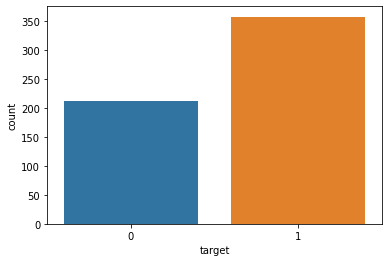

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print(f'There are {pd.concat([X,y], axis=1).isnull().sum().sum()} missing values')
print()
print(f'Count of Malignant tumors {y.value_counts()[0]}')
print(f'Count of Benign tumors {y.value_counts()[1]}')
ax = sns.countplot(y, label='Count')  
plt.show()

Data Preparation in Decision Tree

Data preparation aims to prepare the data for the machine learning model. We will remove correlated features and split the dataset for training and testing to build a tree-based model.

Step 3: We can use a heatmap to visualize the correlation values

Use the heatmap method to display correlation values from the corr() function of the pandas data frame.

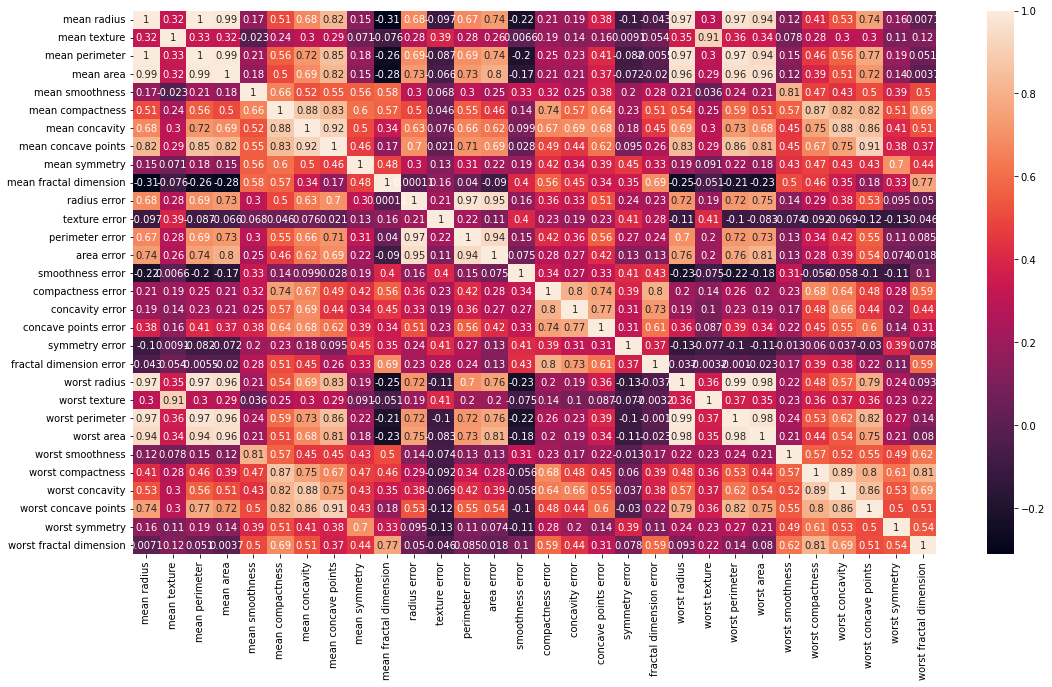

In [11]:
plt.figure(figsize=(18,10))
sns.heatmap(X.corr(), annot=True)
plt.show()

Remove highly correlated values

Use the drop method to drop the highly correlated features. The reason behind it is when there are two highly correlated independent variables, delete one of them since you’ll run into the multicollinearity problem, and the regression coefficients for the two highly linked variables in your regression model will be unreliable.

Storage and performance considerations have also driven the removal of highly correlated variables. Aside from that, the only thing that counts concerning features is if they help with prediction and whether the data quality is enough.

In [12]:
drop_list = ['mean perimeter','mean radius','mean compactness','mean concave points','radius error','perimeter error','compactness error','concave points error','worst radius','worst perimeter','worst compactness','worst concave points','worst texture','worst area']
X = X.drop(drop_list, axis=1)

Step 5: Next step is to split the data into train and test data:

We use the train_test_split class from sklearn.model_selection module to split the dataset into the train and test with the following attributes.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

After performing the data split, check the shape of training and test data:
shape attribute is used to check the shape of the datasets.

In [14]:
print(f'The shape of Train data is {X_train.shape}')
print(f'The shape of Test data is {X_test.shape}')

The shape of Train data is (455, 16)
The shape of Test data is (114, 16)


Step 6

At first, we have to create an instance of the algorithm

Use DecisionTreeClassifier class from sklearn.tree package to create an instance of the Decision Tree algorithm. Use criterion as “gini” and a maximum depth of 2.

In [15]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=2)

Next, we need to fit the algorithm on the training dataset,

Use the fit() method to fit the algorithm on the training data.

In [16]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [17]:
#To make predictions on the test data, we use predict method to make predictions on the test data.

y_test_pred = tree_clf.predict(X_test)

It’s time to calculate the accuracy and confusion matrix of the model,

To calculate the accuracy and confusion matrix of the model, we have to use accuracy_score and confusion_matrix metrics to evaluate the performance of the model.

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(f'The accuracy of the model is: {accuracy_score(y_test,y_test_pred)*100:0.2f}')
print()
print('confusion matrix')
print(f'{confusion_matrix(y_test, y_test_pred)}')

The accuracy of the model is: 95.61

confusion matrix
[[40  3]
 [ 2 69]]


A random forest is a meta estimator that employs averaging to increase predicted accuracy and control over-fitting by fitting several decision tree classifiers for healthcare analysis on various sub-samples of the dataset. If bootstrap=True (default), the max sample argument regulates the sub-sample size; otherwise, the entire dataset is used to create each tree.

The random forest comprises three parts from a broader perspective. These are:

    Random Forest = Decision Trees + Bagging + Feature sampling

Step7: After fitting the model on the training data, the next step is to make predictions and test the performance of the model that has been built.

To create an instance of the algorithm, Use RandomForestClassifier class from sklearn.ensemble package to create an instance of the algorithm. Use n_estimators as 100 and the random state as 32.

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=32)

Next comes fitting the algorithm on the training dataset. We have to use the fit method to fit the algorithm on the training data with two parameters, i.e., X_train and y_train.

In [20]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=32)

Let’s now make the predictions on the test data with a random forest classifier.

In [21]:
y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

Finally, calculate the accuracy and confusion matrix of the model. For that, we have to use accuracy_score and confusion_matrix metrics to evaluate the performance of the model.

In [22]:
print(f'The accuracy of the model on the train data: {accuracy_score(y_train, y_train_pred)*100:0.2f}')
print(f'The accuracy of the model on the test data: {accuracy_score(y_test, y_test_pred)*100:0.2f}')
print()
print('confusion matrix')
print(f'{confusion_matrix(y_test, y_test_pred)}')

The accuracy of the model on the train data: 100.00
The accuracy of the model on the test data: 97.37

confusion matrix
[[41  2]
 [ 1 70]]


Here, the accuracy of the training data is 100, This happens when the model memorizes the noise and fits too close to the training set. The model becomes “overfitted,”. Here, the model is overfitted and we need an optimization algorithm to fit the model.

Hyper parameter-tuned Random Forest Classifier
Hyper-parameter

Selecting a set of ideal hyper-parameters for a learning algorithm is known as hyperparameter optimization or tuning. A hyper-parameter is a value for a parameter that is used to influence the learning process. Other factors, such as node weights, are learned.

We can tune the performance of the model using various parameters that can fix it before fitting the model on the training data. In this step, we will see different parameters associated with random forest algorithms that can help to control the performance of the model.

Step 8

Tuning the features of the Random Forest Classifier.

Use RandomForestClassifier class from sklearn.ensemble package to create an instance of the algorithm. We will reduce the number of decision trees used to build the model (using n_estimators = 10) and fit the depth of the decision tree (max_depth) to 5. Also, use n_jobs = -1 to use all cores for training.

In [23]:
rf_clf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=32, n_jobs=-1)
rf_clf.fit(X_train, y_train)
y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

Finally, calculate the accuracy and confusion matrix of the Hyper-parameter tuned model. we need to use accuracy_score and confusion_matrix metrics to evaluate the performance of the model.

In [24]:
print(f'The accuracy of the model on the train data: {accuracy_score(y_train, y_train_pred)*100:0.2f}')
print(f'The accuracy of the model on the test data: {accuracy_score(y_test, y_test_pred)*100:0.2f}')
print()
print('confusion matrix')
print(f'{confusion_matrix(y_test, y_test_pred)}')

The accuracy of the model on the train data: 98.46
The accuracy of the model on the test data: 96.49

confusion matrix
[[41  2]
 [ 2 69]]


By evaluating the performance of the Hyper-parameter tuned model, the hyper-parameter tuner outputs the setting that yields the highest performing model. The final stage is to build a new model using the best hyper-parameter settings on the complete dataset (training and validation). As a result, the accuracy of train data is 98.46% and test data is 96.49 per cent, respectively, on the hyper-parameter tuning.

Summary

Key takeaways for the decision tree in healthcare analysis are as follow:

1) Tree-Based models are essential tools for any data science professional journey since it is intuitive to explain the tree-based models. In contrast, other machine learning models function as a black box.